# Class 4: Network Analysis with AI Capital Flows Data

This dataset contains real-world information about AI industry capital flows, including investments, partnerships, acquisitions, and business relationships between companies. Each row represents a deal or relationship between two entities, showing how money, resources, and partnerships flow through the AI ecosystem.


### Exercise 1: Network Visualization with Cosmograph
1. Go to [https://cosmograph.app/run/](https://cosmograph.app/run/)
2. Click "Load Graph" → Upload CSV → Select `export_deals.csv`
3. Explore the network visualization and identify patterns

### Exercise 2: Data Inspection in Excel
1. Open `export_deals.csv` in Excel
2. Examine the columns: `from_name`, `to_name`, `deal_type`, `amount_bn`
3. Look at the first 20 rows to understand the data structure

### Exercise 3: Load Data in Python
1. Import pandas
2. Load the `export_deals.csv` file
3. Display basic information about the dataset (shape, columns, first few rows)



In [2]:
# Your code goes here
import pandas as pd

df = pd.read_csv(r"C:\Users\tamas\Desktop\corvinus\Vibe Coding\class 4\export_deals.csv")
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns.tolist())
print("First five rows:")
display(df.head())



Shape of the dataset: (732, 21)
Columns in the dataset: ['Unnamed: 0', 'from_name', 'from_ticker', 'to_name', 'to_ticker', 'deal_type', 'subtype', 'amount_bn', 'amount_approx', 'scale_quantity', 'scale_unit', 'scale_approx', 'tenor_years', 'tenor_start', 'tenor_end', 'tenor_text', 'confidence_level', 'confidence_detail', 'source', 'from_group', 'to_group']
First five rows:


,Unnamed: 0,from_name,from_ticker,to_name,to_ticker,deal_type,subtype,amount_bn,amount_approx,scale_quantity,...,scale_approx,tenor_years,tenor_start,tenor_end,tenor_text,confidence_level,confidence_detail,source,from_group,to_group
0,0,General Catalyst; Spark Capital; Addition; Gre...,NaN,Adept,NaN,INVESTOR,Series B equity investment,0.350,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,Adept press release (adept.ai),Adept,Other,Foundation Labs
1,1,Amazon,NaN,Adept,NaN,CONTENT_LICENSING,"agent technology, multimodal models, datasets",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,REPORTED,CNBC 2024-06-28,Adept,Hyperscalers,Foundation Labs
2,2,Adept,NaN,Oracle,NaN,CUSTOMER,cloud infrastructure GPU access,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,Oracle PR 2024-06-11 via PR Newswire,Adept,Foundation Labs,Hyperscalers
3,3,AMD,AMD,Silo AI,NaN,MNA,Acquisition,0.665,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,AMD press release 2024-07-10,Advanced Micro Devices,Semis & Systems,Other
4,4,AMD,AMD,ZT Systems,NaN,MNA,Acquisition,4.900,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,AMD press release 2024-08-19,Advanced Micro Devices,Semis & Systems,Other


### Exercise 4: Explore Unique Companies
1. Print all unique company names from `from_name` column
2. Print all unique company names from `to_name` column
3. Find companies that appear in both columns


In [10]:
# Your code goes here
# 1. Print all unique company names from `from_name` column
print("Unique company names in 'from_name':")
print(df['from_name'].dropna().unique())

# 2. Print all unique company names from `to_name` column
print("\nUnique company names in 'to_name':")
print(df['to_name'].dropna().unique())

# 3. Find companies that appear in both columns
from_companies = set(df['from_name'].dropna().unique())
to_companies = set(df['to_name'].dropna().unique())
both_columns = from_companies & to_companies
print("\nCompanies that appear in both 'from_name' and 'to_name':")
print(both_columns)



Unique company names in 'from_name':
['General Catalyst; Spark Capital; Addition; Greylock; Atlassian Ventures; Microsoft; NVIDIA; Workday Ventures; PSP Growth; A.Capital; SV Angel; Frontiers Capital; others'
 'Amazon' 'Adept' 'AMD' 'Aligned Data Centers'
 'U.S. Department of Commerce CHIPS Program Office' 'TSMC' 'Apple'
 'NVIDIA' 'Japanese lender(s)' 'Korean lender(s)' 'Google'
 'Lightspeed Venture Partners' 'Databricks' 'Anthropic' 'Morgan Stanley'
 'Apollo' 'Applied Digital' 'Macquarie' 'Supermicro'
 'Hewlett Packard Enterprise' 'Dell Technologies'
 'CIM APLD Lender Holdings, LLC' 'B. Riley Commercial Capital'
 'AI Bridge Funding LLC' 'Cornerstone Bank' 'Mara Garden City LLC'
 'Broadcom' 'VAST Data' 'Meta' 'Arista Board' 'Microsoft' 'ASE Technology'
 'ASML' 'Bitfarms' 'Riot Platforms' 'BlackRock' 'Blackstone'
 'Brookfield Asset Management' 'Bain Capital' 'ByteDance'
 'Guangdong HEC-led consortium' 'Cisco Systems' 'Inovia Capital'
 'Radical Ventures' 'Government of Canada' 'Cohere' '


### Exercise 5: Most Mentioned Companies
1. Count how many times each company appears in `from_name`
2. Count how many times each company appears in `to_name`
3. Combine both counts to find total mentions
4. Display the top 20 most mentioned companies


In [11]:
# Your code goes here
# 1. Count how many times each company appears in `from_name`
from_counts = df['from_name'].value_counts(dropna=True)

# 2. Count how many times each company appears in `to_name`
to_counts = df['to_name'].value_counts(dropna=True)

# 3. Combine both counts to find total mentions
total_mentions = from_counts.add(to_counts, fill_value=0)

# 4. Display the top 20 most mentioned companies
print("Top 20 most mentioned companies (from from_name and to_name):")
display(total_mentions.sort_values(ascending=False).head(20))


Top 20 most mentioned companies (from from_name and to_name):


NVIDIA                        72.0
CoreWeave                     50.0
OpenAI                        47.0
Microsoft                     39.0
Google                        33.0
Meta                          31.0
Amazon                        26.0
Oracle                        25.0
AMD                           22.0
Lambda                        21.0
Mistral                       20.0
Cohere                        18.0
Crusoe                        18.0
Applied Digital               17.0
Apple                         17.0
TSMC                          16.0
Dell Technologies             16.0
Anthropic                     15.0
Hewlett Packard Enterprise    15.0
xAI                           15.0
Name: count, dtype: float64

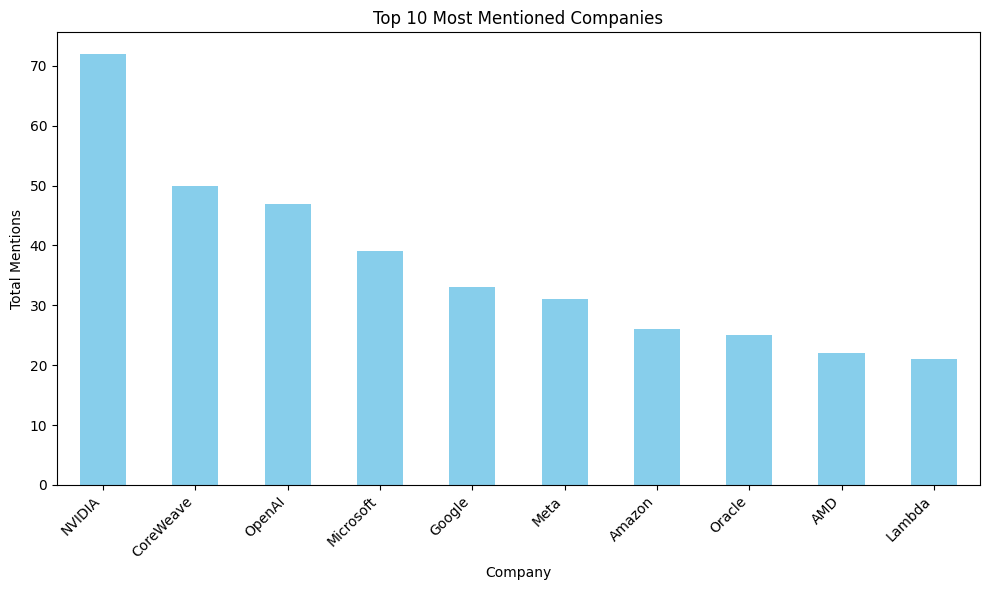

In [17]:
import matplotlib.pyplot as plt

# Get the top 10 companies by total_mentions
top10 = total_mentions.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Mentioned Companies")
plt.ylabel("Total Mentions")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







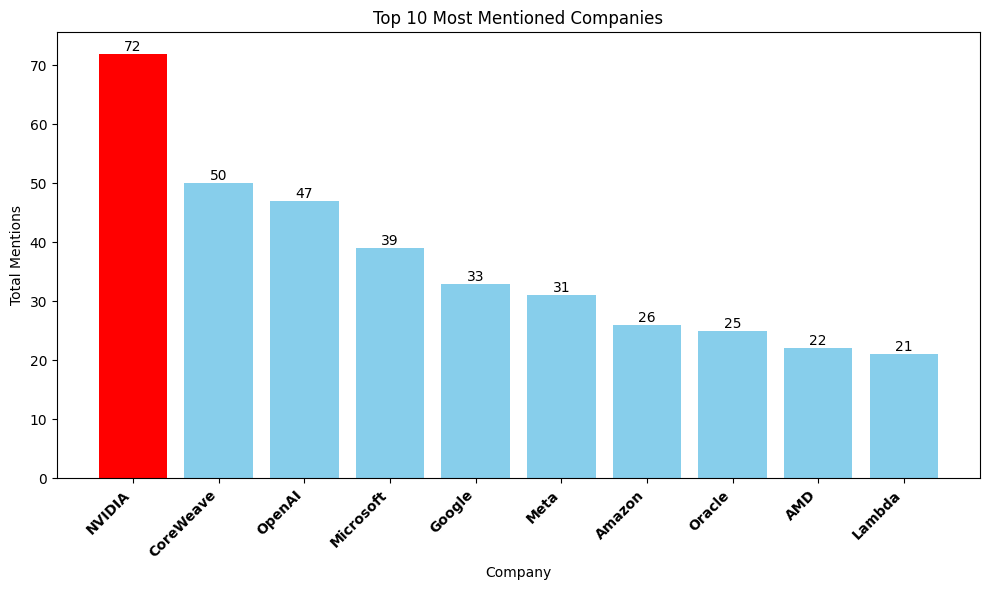

In [22]:
# Get the top 10 companies by total_mentions

top10 = total_mentions.sort_values(ascending=False).head(10)

# Set bar colors, making NVIDIA red and others skyblue
bar_colors = ['red' if str(name).upper() == 'NVIDIA' else 'skyblue' for name in top10.index]

# Plot the bar chart with values on top
plt.figure(figsize=(10,6))
bars = plt.bar(top10.index, top10.values, color=bar_colors)
plt.title("Top 10 Most Mentioned Companies")
plt.ylabel("Total Mentions")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()

# Annotate the value on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

plt.show()



### Questions to Class 1: Company Recognition

Looking at the top 20 most mentioned companies from Exercise 5:

1. Which of these companies have you heard of before?
2. What does each company do? What industry are they in?
3. Are there any companies you're surprised to see on this list?
4. Can you identify which companies are:
   - Tech giants (hyperscalers)?
   - AI startups?
   - Chip manufacturers?
   - Investment firms?
   - Infrastructure/data center companies?

### Exercise 6: Industry Group Analysis
1. Group the data by `from_group` column and count occurrences
2. Group the data by `to_group` column and count occurrences
3. Combine both counts to find which industry groups are most active
4. Display the results sorted by total activity



### Exercise 7: Deal Value by Company
1. Group by `from_name` and sum the `amount_bn` values
2. Group by `to_name` and sum the `amount_bn` values
3. Combine both sums to find total deal value per company
4. Display the top 20 companies by total deal value in billions USD

In [25]:
# Your code goes here
# Assuming your DataFrame is named df

# 1. Group by 'from_group' and count occurrences
from_group_counts = df['from_group'].value_counts()

# 2. Group by 'to_group' and count occurrences
to_group_counts = df['to_group'].value_counts()

# 3. Combine both counts
combined_counts = from_group_counts.add(to_group_counts, fill_value=0)

# 4. Sort by total activity and display
combined_counts = combined_counts.sort_values(ascending=False)
print(combined_counts)


Other                 460
Semis & Systems       280
Hyperscalers          229
AI Clouds & Miners    190
Data Centers          107
Capital Providers      83
Foundation Labs        71
Power & Energy         44
Name: count, dtype: int64


In [28]:
# 1. Group by `from_name` and sum the `amount_bn` values
from_sum = df.groupby('from_name', as_index=True)['amount_bn'].sum()

# 2. Group by `to_name` and sum the `amount_bn` values
to_sum = df.groupby('to_name', as_index=True)['amount_bn'].sum()

# 3. Combine both sums to find total deal value per company
total_deal_value = from_sum.add(to_sum, fill_value=0)

# 4. Display the top 20 companies by total deal value in billions USD
top20 = total_deal_value.sort_values(ascending=False).head(20)
print(top20)


OpenAI                         399.75000
NVIDIA                         283.04450
Meta                           163.75000
CoreWeave                      162.67000
SoftBank                       137.25000
Microsoft                      107.07554
Cisco Systems                  105.00000
Apollo                          87.80000
Broadcom                        84.48600
VMware                          84.18600
BlackRock                       83.45000
Oracle                          72.27000
NTT                             63.13400
Brookfield Asset Management     63.00000
KKR                             61.40500
NTT DATA                        59.75000
xAI                             58.58000
Energy Capital Partners         58.00000
Aligned Data Centers            48.22500
AMD                             45.55000
Name: amount_bn, dtype: float64



### Questions to Class 2: Group by 


The `groupby()` function in pandas is used to split data into groups based on some criteria, then apply a function to each group independently. 

**How it works:**
1. **Split**: The data is divided into groups based on the values in one or more columns
2. **Apply**: A function (like sum, mean, count, etc.) is applied to each group
3. **Combine**: The results are combined into a new data structure


### Exercise 8: Visualize Top 10 Companies by Deal Value
1. Extract the top 10 companies from Exercise 7 results
2. Create a horizontal bar chart showing total deal value
3. Add proper labels, title, and formatting
4. Display the chart

C:\Users\tamas\AppData\Local\Temp\ipykernel_10088\3952832690.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', 10)


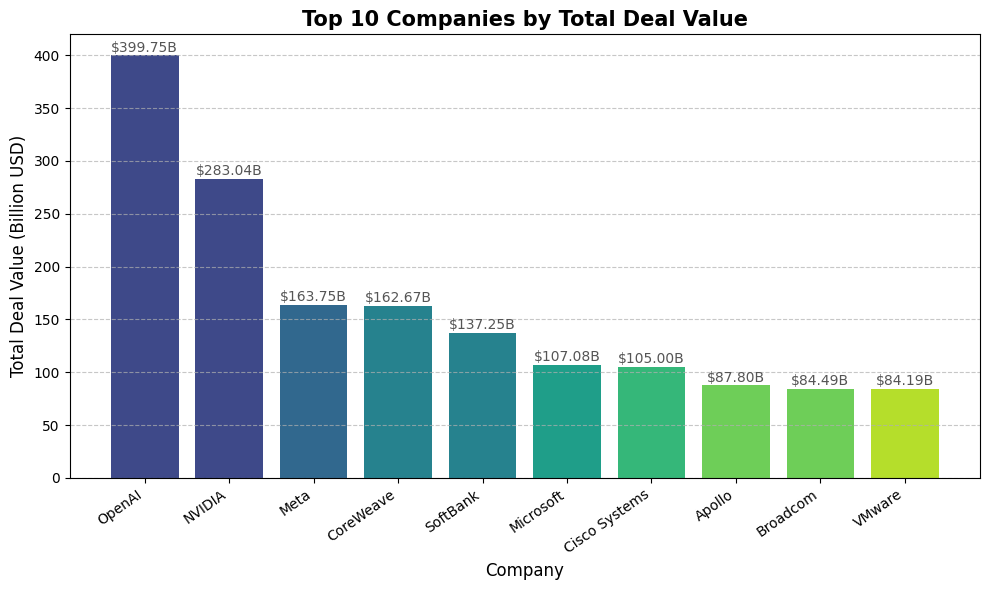

In [34]:
# 1. Extract the top 10 companies from Exercise 7 results (top20)
top10 = top20.head(10)

# 2. Create a vertical bar chart showing total deal value
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10, 6))

# Use a pretty colormap (e.g. 'viridis')
cmap = cm.get_cmap('viridis', 10)
colors = cmap(np.linspace(0.2, 0.85, len(top10)))

bars = plt.bar(top10.index, top10.values, color=colors)

# 3. Add proper labels, title, and formatting
plt.ylabel('Total Deal Value (Billion USD)', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.title('Top 10 Companies by Total Deal Value', fontsize=15, weight='bold')
plt.xticks(rotation=35, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Optional: Add value labels with dollar sign and "billion"
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,      # x position: center of bar
        bar.get_height() + 0.5,               # y position: just above bar
        f"${bar.get_height():,.2f}B",         # Label with currency and measure
        ha='center', va='bottom', fontsize=10, color='#555'
    )

# 4. Display the chart
plt.show()


### Exercise 9: Deal Volume by Deal Type
1. Group the data by `deal_type` column
2. Sum the `amount_bn` values for each deal type
3. Create a bar chart showing the total deal volume by type
4. Display the chart with proper labels


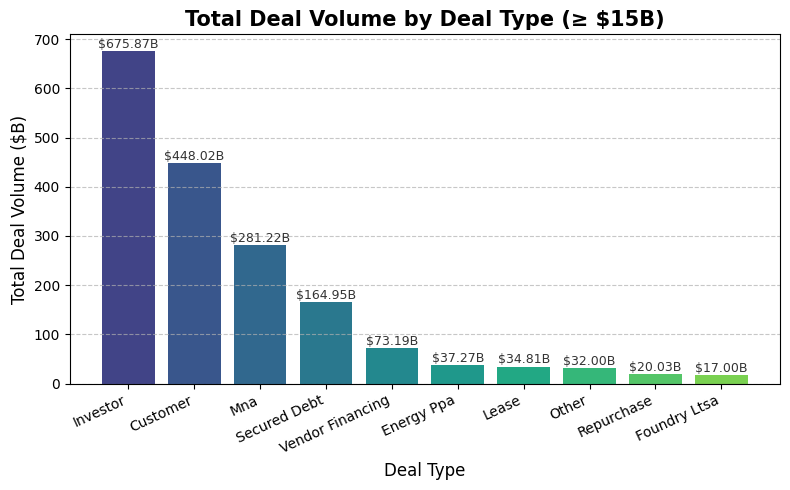

In [41]:
# 1. Group the data by 'deal_type' and sum the total deal volume
deal_type_group = df.groupby('deal_type')['amount_bn'].sum()

# 2. Filter deal types with at least 15 billion USD
deal_type_group = deal_type_group[deal_type_group >= 15].sort_values(ascending=False)

# 3. Prepare prettier x-axis labels (e.g., capitalize and replace underscores)
prettier_labels = [
    str(label).replace('_', ' ').title() for label in deal_type_group.index
]

# 4. Create a bar chart showing the total deal volume by type (>= 15B)
plt.figure(figsize=(8, 5))
bars = plt.bar(
    prettier_labels,
    deal_type_group.values,
    color=cm.viridis(np.linspace(0.2, 0.8, len(deal_type_group)))
)

# 5. Add labels, title, formatting
plt.ylabel('Total Deal Volume ($B)', fontsize=12)  # changed to show $ and bn
plt.xlabel('Deal Type', fontsize=12)
plt.title('Total Deal Volume by Deal Type (≥ $15B)', fontsize=15, weight='bold')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 6. Optional: Add value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.1,
        f"${bar.get_height():.2f}B",
        ha='center', va='bottom', fontsize=9, color='#333'
    )

# 7. Display chart
plt.show()


### Exercise 10: Deal Volume by Industry Group
1. Group by `from_group` and sum the `amount_bn` values
2. Group by `to_group` and sum the `amount_bn` values
3. Combine both to get total volume per industry group
4. Create a horizontal bar chart showing the results


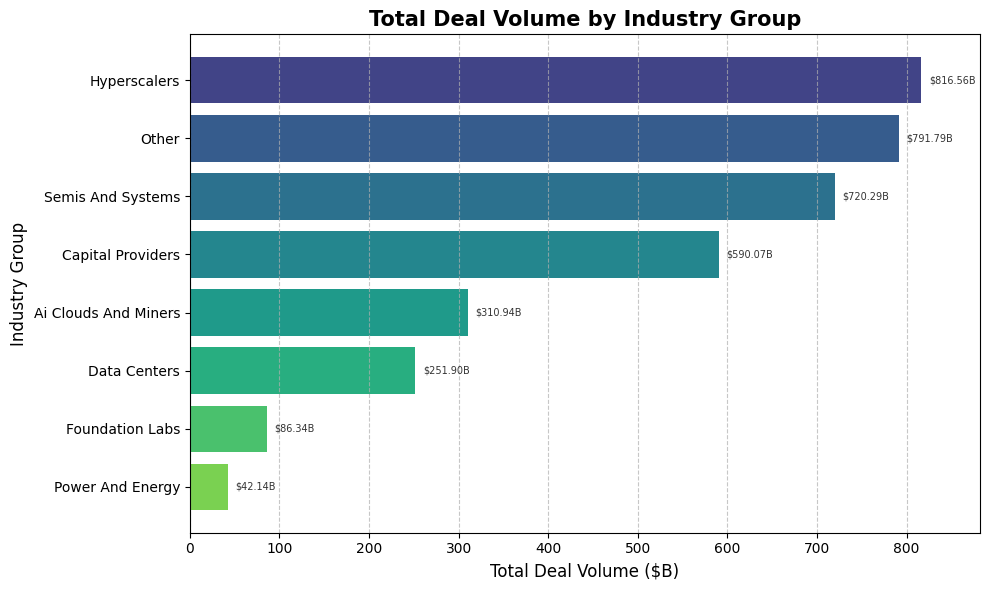

In [47]:
# 1. Group by `from_group` and sum the `amount_bn`
from_group_sum = df.groupby('from_group')['amount_bn'].sum()

# 2. Group by `to_group` and sum the `amount_bn`
to_group_sum = df.groupby('to_group')['amount_bn'].sum()

# 3. Combine both (add together values, treat NaN as 0)
total_group_sum = from_group_sum.add(to_group_sum, fill_value=0).sort_values(ascending=False)

# 4. Prettify group names for plotting (shorten if necessary)
def shorten_label(label, max_length=23):
    s = str(label).replace('&', 'and').replace('_', ' ').title()
    return s if len(s) <= max_length else s[:max_length-3].rstrip() + "..."

prettier_group_labels = [shorten_label(label) for label in total_group_sum.index]

# 5. Plot: horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(prettier_group_labels, total_group_sum.values, color=cm.viridis(np.linspace(0.2, 0.8, len(total_group_sum))))
plt.xlabel('Total Deal Volume ($B)', fontsize=12)
plt.ylabel('Industry Group', fontsize=12)
plt.title('Total Deal Volume by Industry Group', fontsize=15, weight='bold')
plt.gca().invert_yaxis()  # largest at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate values just to the right of each bar, ensuring they fit within the plot
max_width = total_group_sum.values.max()
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    # Put labels a little outside the right end of each bar, but within axis limit
    label_x_pos = width + max_width * 0.01
    plt.text(label_x_pos, y_pos, f"${width:.2f}B",
             va='center', ha='left', fontsize=7, color='#333')  # smaller font
# Make sure the labels don't get clipped
plt.xlim(right=max_width * 1.08)

plt.show()
